# Lead Scoring Case Study - X Education

### Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing Data

In [610]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [611]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline


# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [612]:
#Leads  = pd.read_csv('Leads.csv')
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##  Inspecting the Dataframe

In [613]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

In [614]:
#Length of rows in "Leads"

rows_Leads = len(Leads.index)
rows_Leads

9240

In [615]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [616]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
Leads = Leads.replace('Select', np.nan)

## EDA

### Lets check the rows value for each columns

In [617]:
value_counts = [Leads[p].value_counts() for columns in Leads.columns]
value_counts

[Modified                        3407
 Email Opened                    2827
 SMS Sent                        2172
 Page Visited on Website          318
 Olark Chat Conversation          183
 Email Link Clicked               173
 Email Bounced                     60
 Unsubscribed                      47
 Unreachable                       32
 Had a Phone Conversation          14
 Email Marked Spam                  2
 Email Received                     1
 Resubscribed to emails             1
 Form Submitted on Website          1
 View in browser link Clicked       1
 Approached upfront                 1
 Name: Last Notable Activity, dtype: int64,
 Modified                        3407
 Email Opened                    2827
 SMS Sent                        2172
 Page Visited on Website          318
 Olark Chat Conversation          183
 Email Link Clicked               173
 Email Bounced                     60
 Unsubscribed                      47
 Unreachable                       32
 Had a

### Data Imbalance

#### Lets visualize few categorical columns to check the Data Imbalance

In [618]:
Leads.select_dtypes(include=['category', object]).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

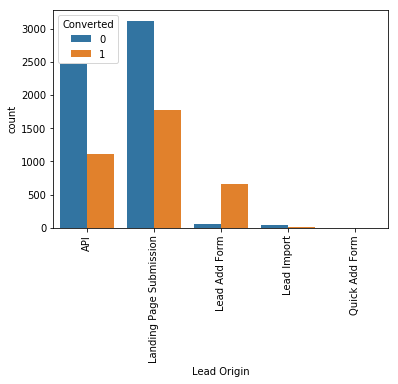

In [619]:
# 'Lead Origin'  - Data is well distributed within the column - Variance is explained 

sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads)
xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

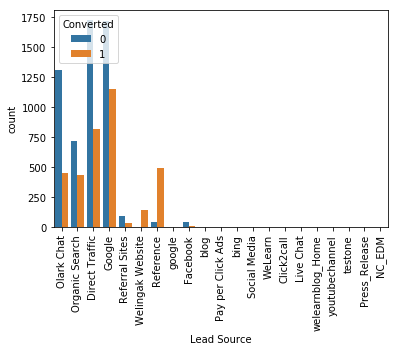

In [620]:
# 'Lead Source' - Data is well distributed within the column - Above average variance is explained 

sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

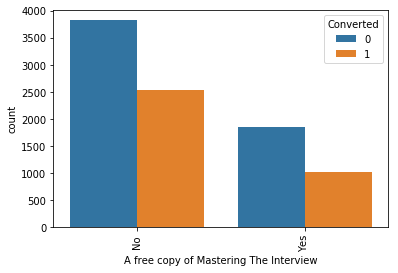

In [621]:
# 'A free copy of Mastering The Interview' - Data is evenly distributed within the column - Variance is explained 


sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads)
xticks(rotation = 90)

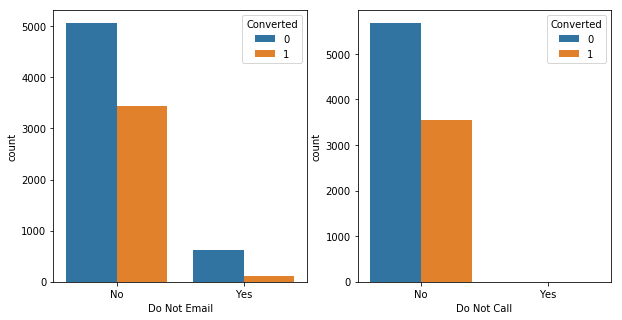

In [622]:
# Do Not Email & Do Not Call - Data is not well distributed having very low variance/ no information

fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = Leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = Leads, ax = axs[1])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

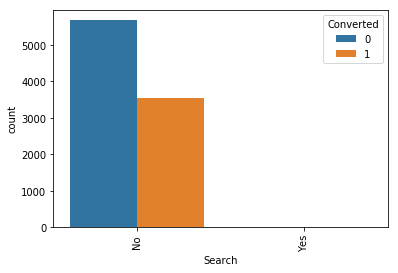

In [623]:
# Search - Data is not well distributed having no variance/ no information
sns.countplot(x = "Search", hue = "Converted", data = Leads)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

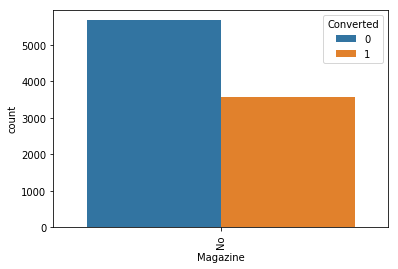

In [624]:
# Magazine - Data distribution is very poor having no variance/ no information
sns.countplot(x = "Magazine", hue = "Converted", data = Leads)
xticks(rotation = 90)

###  As per the above visualization there is very low or no variance in the below columns, we can drop them as they do not provide information in model building

In [625]:
# Dropping columns with low variance
Leads = Leads.drop(['Prospect ID','Do Not Call','TotalVisits','Page Views Per Visit',
'What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','I agree to pay the amount through cheque','Lead Number'],1)

# Dropping 'Country' and 'City' as they are not helpful in our model building

Leads = Leads.drop(['Country', 'City'],1)

In [626]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,How did you hear about X Education,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,Page Visited on Website,NaN,NaN,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,0,674,Email Opened,NaN,NaN,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,1532,Email Opened,Business Administration,NaN,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,305,Unreachable,Media and Advertising,Word Of Mouth,Ringing,Not Sure,NaN,No,Modified
4,Landing Page Submission,Google,No,1,1428,Converted to Lead,NaN,Other,Will revert after reading the email,Might be,NaN,No,Modified


In [627]:
# Lets check the row values after dropping low variance columns

value_counts = [Leads[p].value_counts() for columns in Leads.columns]
value_counts

[Modified                        3407
 Email Opened                    2827
 SMS Sent                        2172
 Page Visited on Website          318
 Olark Chat Conversation          183
 Email Link Clicked               173
 Email Bounced                     60
 Unsubscribed                      47
 Unreachable                       32
 Had a Phone Conversation          14
 Email Marked Spam                  2
 Email Received                     1
 Resubscribed to emails             1
 Form Submitted on Website          1
 View in browser link Clicked       1
 Approached upfront                 1
 Name: Last Notable Activity, dtype: int64,
 Modified                        3407
 Email Opened                    2827
 SMS Sent                        2172
 Page Visited on Website          318
 Olark Chat Conversation          183
 Email Link Clicked               173
 Email Bounced                     60
 Unsubscribed                      47
 Unreachable                       32
 Had a

## Let's drop the low variance rows as having them might affect the model building

## Also, let's club rows values with low frequency to "Other"

In [628]:
#Lead Origin

Leads['Lead Origin'].value_counts()
Leads.drop(Leads.index[Leads['Lead Origin']=='Lead Import'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Origin']=='Quick Add Form'], inplace = True)

In [629]:
#Lead Source

Leads['Lead Source'].value_counts()
Leads.drop(Leads.index[Leads['Lead Source']== 'bing'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='google'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'Click2call'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='Press_Release'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'Social Media'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='Live Chat'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'NC_EDM'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='welearnblog_Home'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'blog'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='youtubechannel'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'testone'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='Facebook'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']== 'WeLearn'], inplace = True)
Leads.drop(Leads.index[Leads['Lead Source']=='Pay per Click Ads'], inplace = True)

# Clubbing few values with less frequency
Leads['Lead Source'] = Leads['Lead Source'].replace(to_replace =['Reference','Welingak Website','Referral Sites'],value = 'other_source')


In [630]:
# Last Activity

Leads['Last Activity'].value_counts()

Leads.drop(Leads.index[Leads['Last Activity']== 'Had a Phone Conversation'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']=='Approached upfront'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']== 'View in browser link Clicked'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']=='Email Marked Spam'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']== 'Email Received'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']=='Visited Booth in Tradeshow'], inplace = True)
Leads.drop(Leads.index[Leads['Last Activity']=='Resubscribed to emails'], inplace = True)

# Clubbing few values with less frequency
Leads['Last Activity'] = Leads['Last Activity'].replace(to_replace =['Unsubscribed','Unreachable','Form Submitted on Website','Email Link Clicked','Email Bounced','Converted to Lead'],value = 'other_activity')



In [631]:
# Specialization
Leads['Specialization'].value_counts()

Finance Management                   968
Human Resource Management            832
Marketing Management                 829
Operations Management                497
Business Administration              397
IT Projects Management               364
Supply Chain Management              343
Banking, Investment And Insurance    336
Media and Advertising                200
Travel and Tourism                   200
International Business               177
Healthcare Management                158
Hospitality Management               113
E-COMMERCE                           108
Retail Management                    100
Rural and Agribusiness                73
E-Business                            56
Services Excellence                   40
Name: Specialization, dtype: int64

In [632]:
# How did you hear about X Education

Leads['How did you hear about X Education'].value_counts()

# Clubbing few values with less frequency
Leads['How did you hear about X Education'] = Leads['How did you hear about X Education'].replace(to_replace =['Advertisements','Social Media','Email','SMS'],value = 'other_education')



In [633]:
Leads['How did you hear about X Education'].value_counts()

Online Search            804
Word Of Mouth            346
Student of SomeSchool    305
Other                    184
other_education          179
Multiple Sources         149
Name: How did you hear about X Education, dtype: int64

In [634]:
# Tags
Leads['Tags'].value_counts()

Leads.drop(Leads.index[Leads['Tags']== 'opp hangup'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='number not provided'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']== 'in touch with EINS'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='Lost to Others'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']== 'Still Thinking'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='In confusion whether part time or DLP'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']== 'Interested in Next batch'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='Want to take admission but has financial problems'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']== 'Lateral student'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='University not recognized'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']== 'Shall take in the next coming month'], inplace = True)
Leads.drop(Leads.index[Leads['Tags']=='Recognition issue (DEC approval)'], inplace = True)

# Clubbing few values with less frequency
Leads['Tags'] = Leads['Tags'].replace(to_replace =['wrong number given','Diploma holder (Not Eligible)','invalid number','Graduation in progress','Interested  in full time MBA',],value = 'other_tags')



In [635]:
#Lead Profile

Leads['Lead Profile'].value_counts()

# Clubbing few values with less frequency
Leads['Lead Profile'] = Leads['Lead Profile'].replace(to_replace =['Dual Specialization Student','Lateral Student','Student of SomeSchool'],value = 'other_profile') 

In [636]:
# Last Notable Activity
Leads['Last Notable Activity'].value_counts()

Leads.drop(Leads.index[Leads['Last Notable Activity']== 'Had a Phone Conversation'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']=='Email Marked Spam'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']== 'Email Received'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']=='Approached upfront'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']== 'View in browser link Clicked'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']=='Form Submitted on Website'], inplace = True)
Leads.drop(Leads.index[Leads['Last Notable Activity']== 'Resubscribed to emails'], inplace = True)

# Clubbing few values with less frequency
Leads['Last Notable Activity'] = Leads['Last Notable Activity'].replace(to_replace =['Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable'],value = 'other_notableact') 

In [637]:
Leads['Last Notable Activity'].value_counts()

Modified                   3290
Email Opened               2769
SMS Sent                   2140
other_notableact            486
Page Visited on Website     313
Name: Last Notable Activity, dtype: int64

In [638]:
# Let's again check the row value after dropping the columns and respective row values

value_counts = [Leads[p].value_counts() for columns in Leads.columns]
value_counts

[Modified                   3290
 Email Opened               2769
 SMS Sent                   2140
 other_notableact            486
 Page Visited on Website     313
 Name: Last Notable Activity, dtype: int64, Modified                   3290
 Email Opened               2769
 SMS Sent                   2140
 other_notableact            486
 Page Visited on Website     313
 Name: Last Notable Activity, dtype: int64, Modified                   3290
 Email Opened               2769
 SMS Sent                   2140
 other_notableact            486
 Page Visited on Website     313
 Name: Last Notable Activity, dtype: int64, Modified                   3290
 Email Opened               2769
 SMS Sent                   2140
 other_notableact            486
 Page Visited on Website     313
 Name: Last Notable Activity, dtype: int64, Modified                   3290
 Email Opened               2769
 SMS Sent                   2140
 other_notableact            486
 Page Visited on Website     313
 Na

### Now we can see all the columns and rows portray better values

In [639]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,How did you hear about X Education,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,Page Visited on Website,NaN,NaN,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,0,674,Email Opened,NaN,NaN,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,1532,Email Opened,Business Administration,NaN,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,305,other_activity,Media and Advertising,Word Of Mouth,Ringing,Not Sure,NaN,No,Modified
4,Landing Page Submission,Google,No,1,1428,other_activity,NaN,Other,Will revert after reading the email,Might be,NaN,No,Modified


### Cleaning the Dataframe

In [640]:
# Checking the missing values
Leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 34
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
Last Activity                               87
Specialization                            3288
How did you hear about X Education        7049
Tags                                      3316
Lead Quality                              4678
Lead Profile                              6690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [641]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Origin                                0.00
Lead Source                                0.38
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Last Activity                              0.97
Specialization                            36.54
How did you hear about X Education        78.34
Tags                                      36.85
Lead Quality                              51.99
Lead Profile                              74.35
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [642]:
# we will drop the columns having more than 45% NA values.
Leads = Leads.drop(Leads.loc[:,list(round(100*(Leads.isnull().sum()/len(Leads.index)), 2)>45)].columns, 1)

In [643]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,Page Visited on Website,NaN,Interested in other courses,No,Modified
1,API,Organic Search,No,0,674,Email Opened,NaN,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,1532,Email Opened,Business Administration,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,305,other_activity,Media and Advertising,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,1428,other_activity,NaN,Will revert after reading the email,No,Modified


In [644]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Origin                                0.00
Lead Source                                0.38
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Last Activity                              0.97
Specialization                            36.54
Tags                                      36.85
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [645]:
# Rest missing values are low and imputing them is not a correct way, so we can drop these rows.
Leads.dropna(inplace = True)

In [646]:
# Checking the dataframe after missing value treatment
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [647]:
# Cleaned Dataset

Leads_cleaned = Leads.copy()
Leads_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,1532,Email Opened,Business Administration,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,305,other_activity,Media and Advertising,Ringing,No,Modified
6,Landing Page Submission,Google,No,1,1640,Email Opened,Supply Chain Management,Will revert after reading the email,No,Modified
10,Landing Page Submission,Organic Search,No,1,1351,Email Opened,Travel and Tourism,Will revert after reading the email,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,1343,Page Visited on Website,Human Resource Management,Lost to EINS,Yes,Page Visited on Website


### Let's check the % of rows remaining after data cleaning

In [648]:
#Length of rows in "Leads_cleaned"

rows_Leads_cleaned = len(Leads_cleaned.index)
rows_Leads_cleaned

4243

In [649]:
# % of rows remaining after Data Cleaning

Rows_percent = (rows_Leads_cleaned/rows_Leads)*100
Rows_percent

45.91991341991342

### Data Preparation

In [650]:
# Converting Yes to 1 and No to 0
Leads_cleaned['Do Not Email'] = Leads_cleaned['Do Not Email'].map({'Yes': 1, 'No': 0})
Leads_cleaned['A free copy of Mastering The Interview'] = Leads_cleaned['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [651]:
Leads_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,1,1532,Email Opened,Business Administration,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,305,other_activity,Media and Advertising,Ringing,0,Modified
6,Landing Page Submission,Google,0,1,1640,Email Opened,Supply Chain Management,Will revert after reading the email,0,Modified
10,Landing Page Submission,Organic Search,0,1,1351,Email Opened,Travel and Tourism,Will revert after reading the email,1,Email Opened
11,Landing Page Submission,Direct Traffic,0,1,1343,Page Visited on Website,Human Resource Management,Lost to EINS,1,Page Visited on Website


## Outlier Treatment

In [652]:
Leads_cleaned.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [653]:
# Checking for outliers in the continuous variables
Leads_categorical = Leads_cleaned[['Total Time Spent on Website']]

In [654]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
Leads_categorical.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website
count,4243.000000
mean,627.402074
std,568.175454
min,0.000000
25%,128.000000
50%,392.000000
75%,1119.500000
90%,1477.800000
95%,1633.900000
99%,1878.320000


From the distribution shown above, you can see that there no outliers in our data. The numbers are gradually increasing.

### Generating dummy values for categorical columns of more than 2 levels

As we can se we have few categorial fields like Lead Source, Specialization and Last Notable Activity have more than 2 levels. So lets generate dummy columns for these first.

In [655]:
Leads_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,1,1532,Email Opened,Business Administration,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,305,other_activity,Media and Advertising,Ringing,0,Modified
6,Landing Page Submission,Google,0,1,1640,Email Opened,Supply Chain Management,Will revert after reading the email,0,Modified
10,Landing Page Submission,Organic Search,0,1,1351,Email Opened,Travel and Tourism,Will revert after reading the email,1,Email Opened
11,Landing Page Submission,Direct Traffic,0,1,1343,Page Visited on Website,Human Resource Management,Lost to EINS,1,Page Visited on Website


In [656]:
df = pd.get_dummies(Leads_cleaned, drop_first =True)
df.head()

,Do Not Email,Converted,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_source,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other_activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_other_tags,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notableact
2,0,1,1532,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,305,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6,0,1,1640,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
10,0,1,1351,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0,1,1343,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4243 entries, 2 to 9239
Data columns (total 44 columns):
Do Not Email                                     4243 non-null int64
Converted                                        4243 non-null int64
Total Time Spent on Website                      4243 non-null int64
A free copy of Mastering The Interview           4243 non-null int64
Lead Origin_Landing Page Submission              4243 non-null uint8
Lead Origin_Lead Add Form                        4243 non-null uint8
Lead Source_Google                               4243 non-null uint8
Lead Source_Olark Chat                           4243 non-null uint8
Lead Source_Organic Search                       4243 non-null uint8
Lead Source_other_source                         4243 non-null uint8
Last Activity_Olark Chat Conversation            4243 non-null uint8
Last Activity_Page Visited on Website            4243 non-null uint8
Last Activity_SMS Sent                           4243 non-null ui

### Test-Train Split

In [658]:
from sklearn.model_selection import train_test_split

In [659]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_source,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other_activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_other_tags,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notableact
2,0,1532,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,305,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6,0,1640,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
10,0,1351,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0,1343,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [660]:
# Putting response variable to y
y = df['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [661]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [662]:
X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_source,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other_activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_other_tags,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notableact
5858,0,1139,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8148,0,109,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3844,0,1448,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
451,0,321,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
718,0,1252,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### Feature Scaling

In [663]:
from sklearn.preprocessing import StandardScaler

In [664]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_source,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_other_activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_other_tags,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notableact
5858,0,0.902907,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8148,0,-0.901780,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3844,0,1.444314,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
451,0,-0.530330,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
718,0,1.100897,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


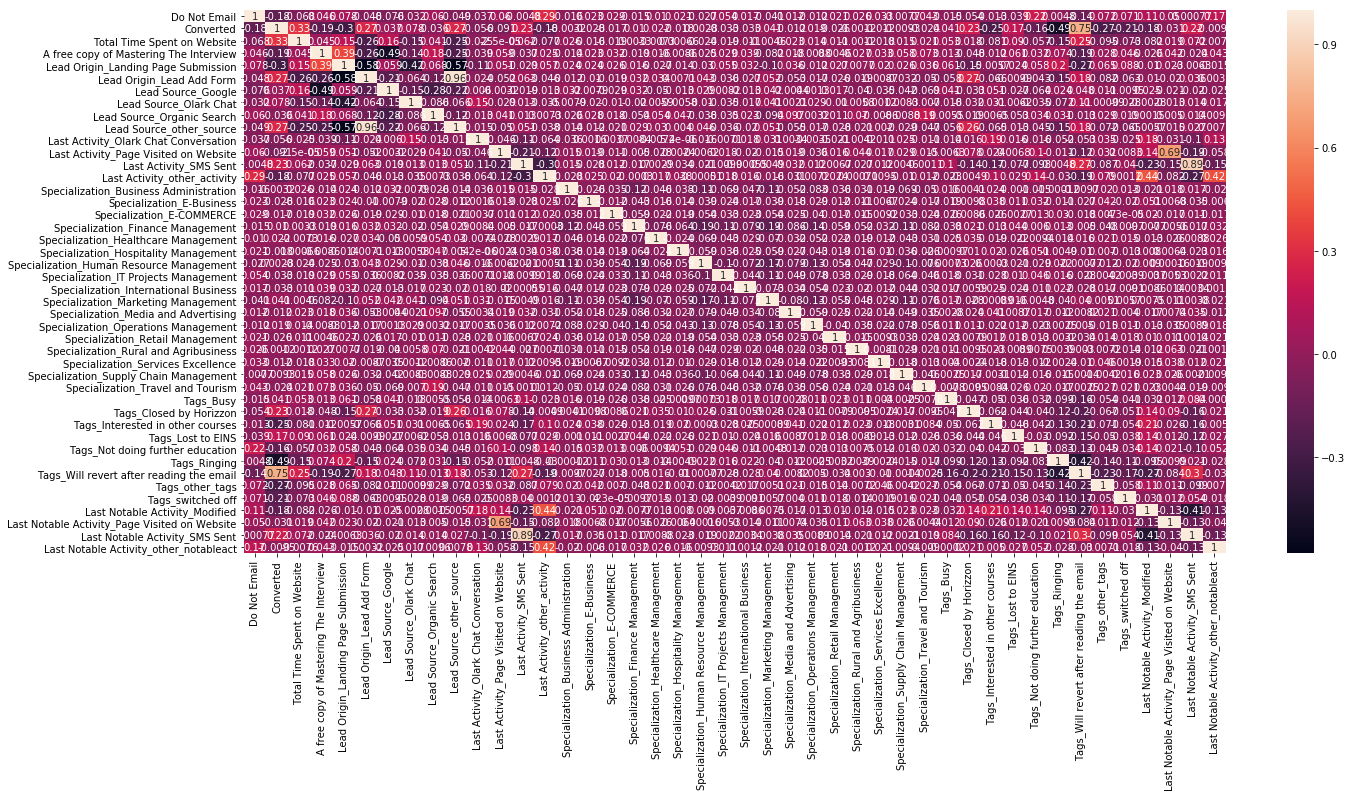

In [665]:
# Let's see the correlation matrix 
plt.figure(figsize = (22,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [666]:
X_test = X_test.drop(['Last Activity_other_activity','Tags_Will revert after reading the email',
'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission','Lead Source_other_source','Last Activity_Page Visited on Website',
'Last Activity_SMS Sent','Last Notable Activity_Modified'], 1)
X_train = X_train.drop(['Last Activity_other_activity','Tags_Will revert after reading the email',
'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission','Lead Source_other_source','Last Activity_Page Visited on Website',
'Last Activity_SMS Sent','Last Notable Activity_Modified'], 1)

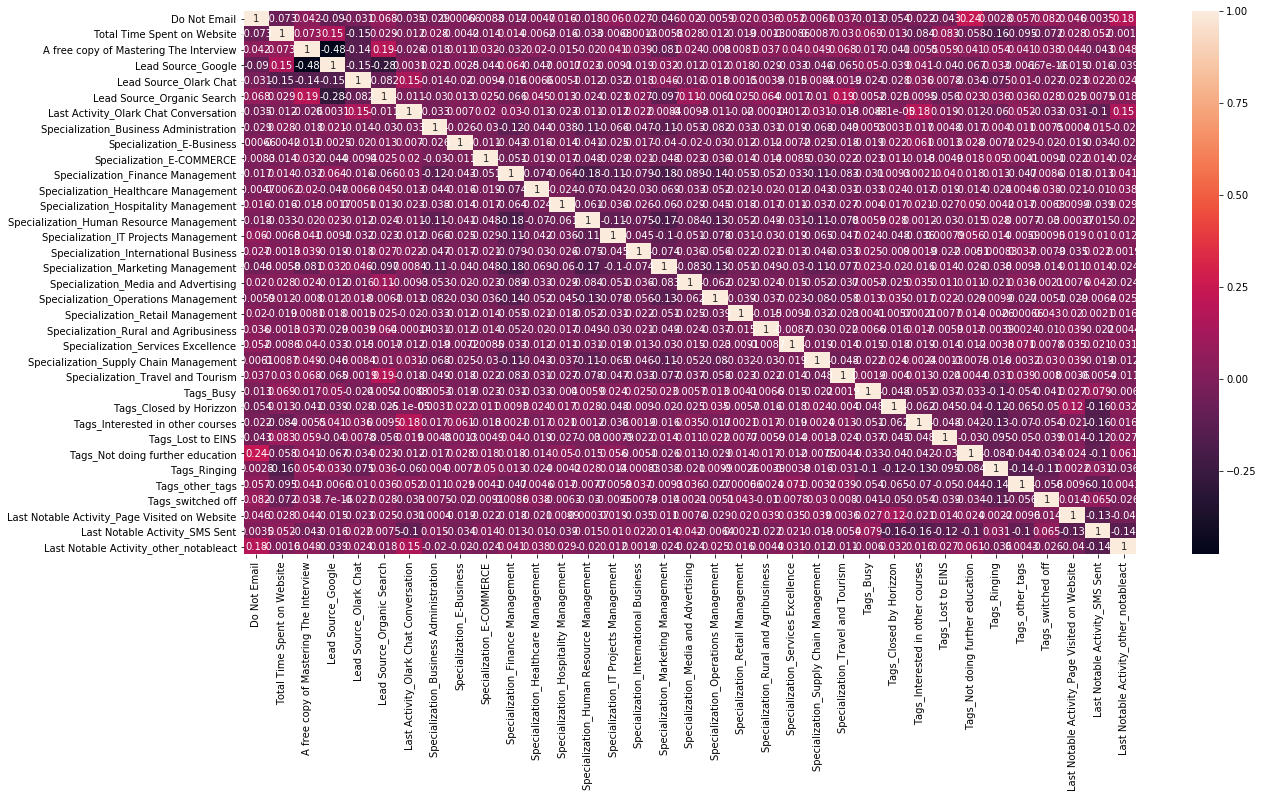

In [667]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [668]:
import statsmodels.api as sm

In [669]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2970
Model:                            GLM   Df Residuals:                     2934
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -585.32
Date:                Mon, 18 Nov 2019   Deviance:                       1170.6
Time:                        01:45:39   Pearson chi2:                 6.85e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.8735      0.378      7.601      0.000       2.133       3.614
Do Not Email                                     -1.7359      0.335     -5.182      0.000      -2.392      -1.079
Total Time Spent on Website                       1.0243      0.089     11.503      0.000       0.850       1.199
A free copy of Mastering The Interview           -1.9170      0.193     -9.938      0.000      -2.295      -1.539
Lead Source_Google                               -0.0344      0.212     -0.162      0.871      -0.449       0.381
Lead Source_Olark Chat                            1.2339      0.441      2.800      0.005       0.370       2.098
Lead Source_Organic Search                        0.7874      0.266      2.959      0.003       0.266       1.309
Last Activity_Olark Chat Conversation            -1.1334      0.518     -2.190      0.029      -2.148      -0.119
Specialization_Business Administration           -0.1346      0.483     -0.278      0.781      -1.082       0.813
Specialization_E-Business                        -0.1497      1.220     -0.123      0.902      -2.540       2.241
Specialization_E-COMMERCE                        -0.9297      0.782     -1.189      0.234      -2.462       0.603
Specialization_Finance Management                -0.7061      0.388     -1.822      0.068      -1.466       0.054
Specialization_Healthcare Management              0.0823      0.621      0.132      0.895      -1.136       1.300
Specialization_Hospitality Management            -0.8797      0.610     -1.443      0.149      -2.075       0.315
Specialization_Human Resource Management         -0.5916      0.393     -1.507      0.132      -1.361       0.178
Specialization_IT Projects Management            -1.0314      0.447     -2.306      0.021      -1.908      -0.155
Specialization_International Business            -1.0230      0.545     -1.876      0.061      -2.092       0.046
Specialization_Marketing Management              -0.4831      0.394     -1.225      0.221      -1.256       0.290
Specialization_Media and Advertising             -0.8904      0.561     -1.587      0.113      -1.990       0.210
Specialization_Operations Management             -0.8099      0.427     -1.899      0.058      -1.646       0.026
Specialization_Retail Management                 -1.0774      0.789     -1.365      0.172      -2.625       0.470
Specialization_Rural and Agribusiness             0.0363      0.795      0.046      0.964      -1.521       1.594
Specialization_Services Excellence               -0.0557      1.017     -0.055      0.956      -2.049       1.937
Specialization_Supply Chain Management           -1.2735      0.446     -2.855      0.004      -2.148      -0.399
Specialization_Travel and Tourism                -0.9244      0.563     -1.642      

## Feature Selection Using RFE

In [670]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [671]:
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [672]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False])

In [673]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 12),
 ('Specialization_Human Resource Management', False, 17),
 ('Specialization_IT Projects Management', False, 6),
 ('Specialization_International Business', False, 8),
 ('Specialization_Marketing Management', False, 21),
 ('Specialization_Media and Advertising', False, 10),
 ('Specialization_Operations Management', False, 14),
 ('Specialization_Retail Management', False, 7),
 ('Specialization_Rural and Ag

In [674]:
col = X_train.columns[rfe.support_]

In [675]:
X_train.columns[~rfe.support_]

Index(['Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_other_notableact'],
      dtype='object')

In [676]:
# Now we have 15 columns after RFE
X_train[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 5858 to 8625
Data columns (total 15 columns):
Do Not Email                              2970 non-null int64
Total Time Spent on Website               2970 non-null float64
A free copy of Mastering The Interview    2970 non-null int64
Lead Source_Olark Chat                    2970 non-null uint8
Last Activity_Olark Chat Conversation     2970 non-null uint8
Specialization_Healthcare Management      2970 non-null uint8
Tags_Busy                                 2970 non-null uint8
Tags_Closed by Horizzon                   2970 non-null uint8
Tags_Interested in other courses          2970 non-null uint8
Tags_Lost to EINS                         2970 non-null uint8
Tags_Not doing further education          2970 non-null uint8
Tags_Ringing                              2970 non-null uint8
Tags_other_tags                           2970 non-null uint8
Tags_switched off                         2970 non-null uint8
Last Notable Activit

##### Assessing the model with StatsModels

In [677]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2970
Model:                            GLM   Df Residuals:                     2954
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -600.47
Date:                Mon, 18 Nov 2019   Deviance:                       1200.9
Time:                        01:45:39   Pearson chi2:                 5.99e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.2530      0.147     15.277      0.000       1.964       2.542
Do Not Email                              -1.4770      0.308     -4.800      0.000      -2.080      -0.874
Total Time Spent on Website                0.9993      0.085     11.714      0.000       0.832       1.167
A free copy of Mastering The Interview    -1.8204      0.168    -10.863      0.000      -2.149      -1.492
Lead Source_Olark Chat                     1.1242      0.416      2.702      0.007       0.309       1.940
Last Activity_Olark Chat Conversation     -1.0630      0.486     -2.186      0.029      -2.016      -0.110
Specialization_Healthcare Management       0.7623      0.518      1.473      0.141      -0.252       1.777
Tags_Busy                                 -1.6217      0.269     -6.034      0.000      -2.148      -1.095
Tags_Closed by Horizzon                    4.0476      1.017      3.978      0.000       2.054       6.042
Tags_Interested in other courses          -5.4576      0.499    -10.943      0.000      -6.435      -4.480
Tags_Lost to EINS                          2.5886      0.612      4.233      0.000       1.390       3.787
Tags_Not doing further education          -5.6954      1.049     -5.431      0.000      -7.751      -3.640
Tags_Ringing                              -6.3198      0.317    -19.920      0.000      -6.942      -5.698
Tags_other_tags                           -5.4315      0.456    -11.912      0.000      -6.325      -4.538
Tags_switched off                         -7.1450      0.782     -9.138      0.000      -8.678      -5.612
Last Notable Activity_SMS Sent             2.1968      0.212     10.361      0.000       1.781       2.612
==========================================================================================================
"""

 - Here we can see that all features selected by RFE have very good p-Value apart from "Specialization_Healthcare Management".
 - some coefficient have negative values as well. But for now let's remove the one column which have high p-Value.

In [678]:
X_update=X_train[col].drop('Specialization_Healthcare Management',1)
X_update

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_other_tags,Tags_switched off,Last Notable Activity_SMS Sent
5858,0,0.902907,0,0,0,0,0,0,0,0,0,0,0,0
8148,0,-0.901780,1,0,0,0,0,0,0,0,0,0,0,0
3844,0,1.444314,0,0,0,0,0,0,0,0,1,0,0,0
451,0,-0.530330,1,0,0,0,0,0,0,0,1,0,0,0
718,0,1.100897,1,0,0,0,0,0,0,0,0,0,0,0
7124,0,-0.709047,1,0,0,0,0,0,0,0,1,0,0,0
4648,0,-0.099308,0,0,0,0,0,0,0,0,0,0,0,0
1470,0,-0.682765,0,0,0,0,0,0,0,0,0,0,0,1
1351,0,-0.528578,1,0,0,0,0,0,0,0,0,0,1,1
8881,1,-1.033190,1,0,0,0,0,1,0,0,0,0,0,0


In [679]:
# Now let's run the model with updated columns

X_train_sm = sm.add_constant(X_update)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2970
Model:                            GLM   Df Residuals:                     2955
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -601.65
Date:                Mon, 18 Nov 2019   Deviance:                       1203.3
Time:                        01:45:39   Pearson chi2:                 6.29e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.2753      0.147     15.460      0.000       1.987       2.564
Do Not Email                              -1.4706      0.307     -4.791      0.000      -2.072      -0.869
Total Time Spent on Website                0.9977      0.085     11.713      0.000       0.831       1.165
A free copy of Mastering The Interview    -1.8207      0.168    -10.867      0.000      -2.149      -1.492
Lead Source_Olark Chat                     1.1268      0.417      2.705      0.007       0.310       1.943
Last Activity_Olark Chat Conversation     -1.0834      0.486     -2.228      0.026      -2.036      -0.130
Tags_Busy                                 -1.6428      0.269     -6.118      0.000      -2.169      -1.117
Tags_Closed by Horizzon                    4.0526      1.017      3.985      0.000       2.059       6.046
Tags_Interested in other courses          -5.4543      0.499    -10.936      0.000      -6.432      -4.477
Tags_Lost to EINS                          2.5700      0.611      4.203      0.000       1.371       3.768
Tags_Not doing further education          -5.7138      1.049     -5.448      0.000      -7.769      -3.658
Tags_Ringing                              -6.3276      0.318    -19.929      0.000      -6.950      -5.705
Tags_other_tags                           -5.4325      0.457    -11.899      0.000      -6.327      -4.538
Tags_switched off                         -7.1344      0.784     -9.103      0.000      -8.671      -5.598
Last Notable Activity_SMS Sent             2.1945      0.212     10.354      0.000       1.779       2.610
==========================================================================================================
"""

 - Here we can see that all features selected by RFE have very good p-Value(Less then 0.05)
 - But let's use this model to predict the whether the lead is Hot or not 

In [680]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5858    0.959923
8148    0.390530
3844    0.068409
451     0.001655
718     0.825332
7124    0.001385
4648    0.898091
1470    0.977874
1351    0.006609
8881    0.000552
dtype: float64

In [681]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.59923088e-01, 3.90530184e-01, 6.84085139e-02, 1.65534062e-03,
       8.25332235e-01, 1.38538674e-03, 8.98090575e-01, 9.77873680e-01,
       6.60940174e-03, 5.52218038e-04])

In [682]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,1,0.959923,5858
1,0,0.390530,8148
2,0,0.068409,3844
3,0,0.001655,451
4,1,0.825332,718


In [683]:
#Lets's add new column as predicted to compare the predicted result with the original values
#First let's consider if probability is > 0.5 then conerted else not converted

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,1,0.959923,5858,1
1,0,0.390530,8148,0
2,0,0.068409,3844,0
3,0,0.001655,451,0
4,1,0.825332,718,1


In [684]:
#Now let's see the confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[1312  122]
 [  78 1458]]


In [685]:
#Chech the accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9326599326599326


 - Let's check the VIF and find if some features can be removed or not.

In [686]:
#import the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_update.columns
vif['VIF'] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,A free copy of Mastering The Interview,1.59
10,Tags_Ringing,1.28
13,Last Notable Activity_SMS Sent,1.27
0,Do Not Email,1.16
1,Total Time Spent on Website,1.12
7,Tags_Interested in other courses,1.11
9,Tags_Not doing further education,1.11
11,Tags_other_tags,1.10
4,Last Activity_Olark Chat Conversation,1.09
3,Lead Source_Olark Chat,1.08


 - VIF of all features is less then 2 which is quite good. 
 - We can use our current model without any changes, but let's check other matrix values such as specificity,senitivity etc.

In [687]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [688]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.94921875

In [689]:
# Let us calculate specificity
TN / float(TN+FP)

0.9149232914923291

In [690]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08507670850767085


In [691]:
# positive predictive value 
print (TP / float(TP+FP))

0.9227848101265823


In [692]:
# Negative predictive value
print (TN / float(TN+ FN))

0.943884892086331


### ROC Curve:-
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [693]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [694]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

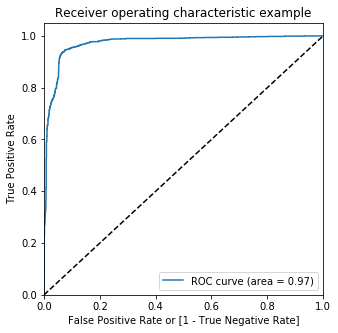

In [695]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [696]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.959923,5858,1,1,1,1,1,1,1,1,1,1,1
1,0,0.390530,8148,0,1,1,1,1,0,0,0,0,0,0
2,0,0.068409,3844,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001655,451,0,1,0,0,0,0,0,0,0,0,0
4,1,0.825332,718,1,1,1,1,1,1,1,1,1,1,0


In [697]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.517172  1.000000  0.000000
0.1   0.1  0.882828  0.984375  0.774059
0.2   0.2  0.903367  0.977865  0.823570
0.3   0.3  0.908418  0.976562  0.835425
0.4   0.4  0.919529  0.963542  0.872385
0.5   0.5  0.932660  0.949219  0.914923
0.6   0.6  0.934343  0.933594  0.935146
0.7   0.7  0.929293  0.914714  0.944909
0.8   0.8  0.881818  0.814453  0.953975
0.9   0.9  0.829630  0.685547  0.983961


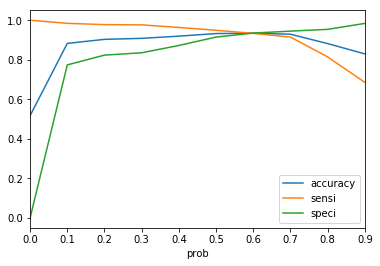

In [698]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 - From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [699]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.959923,5858,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.390530,8148,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.068409,3844,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001655,451,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.825332,718,1,1,1,1,1,1,1,1,1,1,0,1


In [700]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9343434343434344

In [701]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1341,   93],
       [ 102, 1434]], dtype=int64)

In [702]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [703]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.93359375

In [704]:
# Let us calculate specificity
TN / float(TN+FP)

0.9351464435146444

In [705]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06485355648535565


In [706]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9390962671905697


In [707]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293139293139293


Precision and Recall

In [708]:
from sklearn.metrics import precision_score, recall_score

In [709]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9227848101265823

In [710]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.94921875

 - Precision and Recall score are quite good and both are above 90%. So we can move to test set and predict using the same model.

### Making predictions on the test set

In [711]:
cole=X_update.columns
cole

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_other_tags', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [712]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])
X_test = X_test[cole]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_other_tags,Tags_switched off,Last Notable Activity_SMS Sent
51,0,-0.812422,0,0,0,0,0,0,0,0,0,0,0,0
6465,0,-0.661739,0,0,0,0,0,0,0,0,0,1,0,0
3656,1,-0.602167,1,0,0,0,0,0,0,0,0,0,0,0
3282,0,1.714141,1,0,0,0,0,0,1,0,0,0,0,0
7948,1,-0.561868,0,0,0,0,0,0,0,1,0,0,0,0


In [713]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [714]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

51      0.812257
6465    0.021511
3656    0.165655
3282    0.991291
7948    0.004195
5067    0.001274
1444    0.984124
6674    0.011782
2854    0.993059
5509    0.087949
dtype: float64

In [715]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
51,0.812257
6465,0.021511
3656,0.165655
3282,0.991291
7948,0.004195


In [716]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,0,51,0.812257
1,0,6465,0.021511
2,0,3656,0.165655
3,1,3282,0.991291
4,0,7948,0.004195


In [717]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Coverted_prob'})

In [718]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Converted','Coverted_prob'], axis=1)

In [719]:
y_pred_final['final_predicted'] = y_pred_final.Coverted_prob.map(lambda x: 1 if x > 0.6 else 0)
y_pred_final['lead_score'] = y_pred_final.Coverted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,ID,Converted,Coverted_prob,final_predicted,lead_score
0,51,0,0.812257,1,81
1,6465,0,0.021511,0,2
2,3656,0,0.165655,0,17
3,3282,1,0.991291,1,99
4,7948,0,0.004195,0,0


In [720]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9167321288295365

In [721]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[575,  51],
       [ 55, 592]], dtype=int64)

In [722]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [723]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.9149922720247295

In [724]:
# specificity
TN / float(TN+FP)

0.9185303514376997

# Final Observation:

### As we can see that we have 91% accuracy as well as 91% sensitivity and specificity

 - With this we achieve the target of 80% lead conversion rate given by the CEO.

 - Also, the assigned lead score to each of the leads shows that the customers with higher lead    score are "Hot Leads" and have a higher conversion chance and the customers with lower lead score are "Cold Leads" and have a lower conversion chance. 

 - Now the company can successfully identify this set of “Hot leads”, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.